# **[PolymerCost 3D Graphing with Animation](https://www.polymercost.com)**
**by [OHPARC: The Ohio Polymer & Additives Research Center](https://www.ohparc.com)**

This Python Notebook will show our polymer formulation and costing software being used to generate graphics in python.  All Software is MIT Licensed and available at www.github.com/OhioPolymerAdditivesResearchCenter/PolymerCost

Run the cell below to produce a 3D graph of PVC Durometer vs DINP and CaCO3 PHR as per formulation.  

This notebook will only display the 2D non animated image, but both that and the animated 3D image are produced and saved.

On the left panel, click on the 4th icon down, the one that looks like a file folder or briefcase.  In there are your files.  

ani.gif is the 3D animated gif.
figurine.png is the 2D non animated png.

Note that if you are making many different images, this program will always overwrite the old image unless you give it a different name.

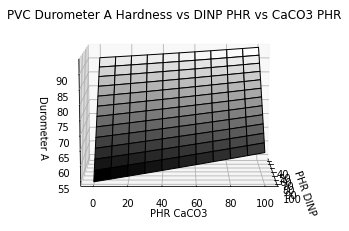

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


#my formulas for graphing
def flex_clear_dinp(phr):
    return 113.8 - 0.6*phr

def flex_filled(duro_A, phr_CaCO3):

    a = -0.001058114988 * duro_A * duro_A
    b = -0.001695411881 * duro_A * phr_CaCO3
    c = 0.00004967760719 * phr_CaCO3 * phr_CaCO3
    d = 1.158214659 * duro_A
    e = 0.1840327098 * phr_CaCO3
    f = -5.05711084
    duro = a + b + c + d + e + f
    
    return duro
    


def z_func(x,y):
    return flex_filled(flex_clear_dinp(x),y)
#set up x and y space for graph
#here x is phr DINP and y is phr CaCO3, just like in the functions
x = np.linspace(40, 100,13)
y = np.linspace(0, 100, 11)
#make a meshgrid out of x and y to plot against the z function, here filled once determined clear duro
X,Y = np.meshgrid(x,y)
Z = z_func(X,Y)



#plot the 3d graphs
fig = plt.figure()
ax = plt.axes(projection='3d')

#still plotting....
#either surface or wireframe work well here
ax.plot_surface(X, Y, Z,cmap='gist_gray', edgecolor='black')
#ax.plot_wireframe(X, Y, Z,cmap='gist_gray', edgecolor='black')
#ax.contour3D(X, Y, Z, 50, cmap='binary')


#setting graph up
ax.set_title('PVC Durometer A Hardness vs DINP PHR vs CaCO3 PHR')
ax.set_xlabel('PHR DINP')
ax.set_ylabel('PHR CaCO3')
ax.set_zlabel('Durometer A')


#new code to animate
ax.view_init(elev=30,azim=0)
def animate(i):
    ax.view_init(elev=10, azim=3*i)

ani = animation.FuncAnimation (fig,animate,frames=120,interval=50)
#end animation code

#save animated gif
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)


#show the graph spinning
plt.show()
#2d save
fig.savefig('figurine.png')

#you can find the file you saved in the same folder this python script is
#if you are running this in Jupyter Notebook or Google Colab, check out the left bar and click on the files icon (4th down, looks like a briefcase)
#your file is in there if you want to download it locally
